In [28]:
import navis 
import navis.interfaces.neuprint as neu
import NeuromodPlasticity as nmp 

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['pdf.fonttype']=42

%load_ext autoreload
%autoreload 2 


%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
c = nmp.connectomics.npt_client()


In [30]:
epgs, _ = neu.fetch_neurons(neu.SegmentCriteria(instance=".*EPG.*", regex=True))
epgs.head()

,bodyId,instance,type,pre,post,downstream,upstream,mito,size,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
0,387364605,EPG(PB08)_L3,EPG,645,4350,3725,4350,295,1469716322,Traced,False,Roughly traced,PDM01,348.5,"[28767, 19072, 6096]","{'CX': {'pre': 560, 'post': 4183, 'downstream'...",EPG,"[BU(R), CX, EB, EBr1, EBr2r4, EBr3am, EBr3d, E...","[CX, EB, EBr1, EBr2r4, EBr3am, EBr3d, EBr3pw, ..."
1,416642425,EPG(PB08)_R4,EPG,470,3834,2869,3834,208,1169220265,Traced,False,Roughly traced,PDM02,392.5,"[23724, 17059, 6512]","{'CX': {'pre': 469, 'post': 3824, 'downstream'...",EPG,"[CX, EB, EBr1, EBr2r4, EBr3am, EBr3d, EBr3pw, ...","[CX, EB, EBr1, EBr2r4, EBr3pw, EBr6, FB, FBl4,..."
2,449438847,EPG(PB08)_L3,EPG,609,4595,3640,4595,272,1356917252,Traced,False,Roughly traced,PDM01,325.5,"[29152, 19142, 6904]","{'CX': {'pre': 528, 'post': 4425, 'downstream'...",EPG,"[CRE(-ROB,-RUB)(R), CRE(R), CX, EB, EBr1, EBr2...","[CX, EB, EBr1, EBr2r4, EBr3pw, EBr6, GA(R), LA..."
3,478375456,EPG(PB08)_R3,EPG,483,4249,2802,4249,253,1290806813,Traced,False,Roughly traced,PDM01,357.0,"[24001, 16725, 7480]","{'CX': {'pre': 483, 'post': 4241, 'downstream'...",EPG,"[ATL(R), CX, EB, EBr1, EBr2r4, EBr3am, EBr3d, ...","[CX, EB, EBr1, EBr2r4, EBr3pw, EBr5, EBr6, FB,..."
4,541118908,EPG(PB08)_R3,EPG,523,3796,2982,3796,223,1092662993,Traced,False,Roughly traced,PDM01,339.0,"[21902, 18096, 5824]","{'CX': {'pre': 521, 'post': 3791, 'downstream'...",EPG,"[ATL(R), CX, EB, EBr1, EBr2r4, EBr3am, EBr3d, ...","[CX, EB, EBr1, EBr2r4, EBr3d, EBr3pw, EBr5, EB..."


In [31]:
eb, pb, gall = neu.fetch_roi("EB"), neu.fetch_roi("PB"), neu.fetch_roi("GA(R)")

In [32]:
neu.queries.fetch_roi_hierarchy()

{'hemibrain': {'AL(L)*': {'AL-D(L)': {},
   'AL-DA2(L)': {},
   'AL-DA3(L)': {},
   'AL-DA4m(L)': {},
   'AL-DC1(L)': {},
   'AL-DC2(L)': {},
   'AL-DC4(L)': {},
   'AL-DL4(L)': {},
   'AL-DL5(L)': {},
   'AL-DM1(L)': {},
   'AL-DM2(L)': {},
   'AL-DM3(L)': {},
   'AL-DM4(L)': {},
   'AL-DM5(L)': {},
   'AL-DM6(L)': {},
   'AL-DP1m(L)': {},
   'AL-VA6(L)': {},
   'AL-VM7d(L)': {},
   'AL-VM7v(L)': {}},
  'AL(R)*': {'AL-D(R)': {},
   'AL-DA1(R)': {},
   'AL-DA2(R)': {},
   'AL-DA3(R)': {},
   'AL-DA4l(R)': {},
   'AL-DA4m(R)': {},
   'AL-DC1(R)': {},
   'AL-DC2(R)': {},
   'AL-DC3(R)': {},
   'AL-DC4(R)': {},
   'AL-DL1(R)': {},
   'AL-DL2d(R)': {},
   'AL-DL2v(R)': {},
   'AL-DL3(R)': {},
   'AL-DL4(R)': {},
   'AL-DL5(R)': {},
   'AL-DM1(R)': {},
   'AL-DM2(R)': {},
   'AL-DM3(R)': {},
   'AL-DM4(R)': {},
   'AL-DM5(R)': {},
   'AL-DM6(R)': {},
   'AL-DP1l(R)': {},
   'AL-DP1m(R)': {},
   'AL-V(R)': {},
   'AL-VA1d(R)': {},
   'AL-VA1v(R)': {},
   'AL-VA2(R)': {},
   'AL-VA3(R)': {},


In [33]:
epg_skeletons = neu.fetch_skeletons(
    neu.SegmentCriteria(instance=".*EPG.*", regex=True), with_synapses=False
)
epg_skeletons.head()

Fetching:   0%|          | 0/50 [00:00<?, ?it/s]

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,navis.TreeNeuron,EPG(PB08)_R4,416642425,11962,None,1292,1321,448624.4375,11921,8 nanometer
1,navis.TreeNeuron,EPG(PB08)_L3,449438847,13146,None,1467,1510,496576.1875,3,8 nanometer
2,navis.TreeNeuron,EPG(PB08)_L6,541870397,11042,None,1100,1127,431785.2500,7371,8 nanometer
3,navis.TreeNeuron,EPG(PB08)_R2,632544268,12914,None,1479,1510,452786.1875,12883,8 nanometer
4,navis.TreeNeuron,EPG(PB08)_L1,572870540,14361,None,1616,1658,541049.8750,14150,8 nanometer


In [34]:
el_skeletons = neu.fetch_skeletons(
    neu.SegmentCriteria(instance=".*EL.*", regex=True), with_synapses=False
)
el_skeletons.head()

Fetching:   0%|          | 0/18 [00:00<?, ?it/s]

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,navis.TreeNeuron,EL(EQ5)_R,725951660,14383,None,2360,2411,653261.2500,15,8 nanometer
1,navis.TreeNeuron,EL(EQ5)_R,725942718,15633,None,2472,2522,687166.6250,15597,8 nanometer
2,navis.TreeNeuron,EL(EQ5)_L,912596952,13212,None,1848,1889,602444.9375,7927,8 nanometer
3,navis.TreeNeuron,EL(EQ5)_L,820144012,14720,None,2078,2117,664833.2500,14603,8 nanometer
4,navis.TreeNeuron,EL(EQ5)_L,1005308608,14603,None,2182,2232,623938.7500,8,8 nanometer


In [35]:
er4d_skeletons = neu.fetch_skeletons(
    neu.SegmentCriteria(instance=".*ER4d.*", regex=True), with_synapses=False
)
er4d_skeletons.head()

Fetching:   0%|          | 0/25 [00:00<?, ?it/s]

,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,navis.TreeNeuron,ER4d(ring)_R,1167295916,5362,None,1041,1081,317642.59375,5282.0,8 nanometer
1,navis.TreeNeuron,ER4d(ring)_R,1167300154,5036,None,916,933,287923.15625,4942.0,8 nanometer
2,navis.TreeNeuron,ER4d(ring)_L,1167300055,4892,None,912,934,267266.31250,NaN,8 nanometer
3,navis.TreeNeuron,ER4d(ring)_L,1167295872,5540,None,1030,1059,288380.18750,NaN,8 nanometer
4,navis.TreeNeuron,ER4d(ring)_L,1167295853,5015,None,954,976,266001.09375,NaN,8 nanometer


In [47]:
navis.plot3d(
     [epg_skeletons[0], el_skeletons[6], er4d_skeletons[3], eb, pb, gall],
    legend=False)

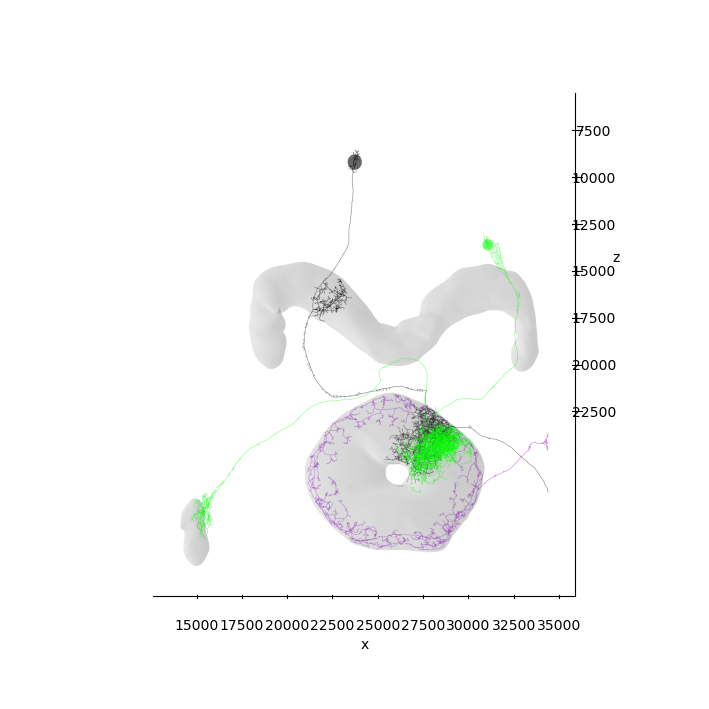

In [46]:
fig, ax = navis.plot2d(
    [epg_skeletons[0], el_skeletons[6], er4d_skeletons[3], eb, pb, gall],
    method="3d",
    connectors=True,
    linewidth=0.5,  # Make neuron a bit thinner to emphasize the synapses
    view=("x", "-z"),
    alpha=0.4,
    color=((0,0,0), (0, 1, 0), (148/256,0,211/256)),
)

ax.elev = -20
ax.grid(False)

plt.tight_layout()

In [38]:
print(len(epg_skeletons), len(el_skeletons), len(er4d_skeletons))

50 18 25


In [48]:
edges = np.linspace(0, 360, num=8)
epg_centers = (edges[:-1] + edges[1:]) / 2

edges = np.linspace(0, 360, num=18)
el_centers = (edges[:-1] + edges[1:]) / 2



In [49]:
epg_centers

array([ 25.71428571,  77.14285714, 128.57142857, 180.        ,
       231.42857143, 282.85714286, 334.28571429])

In [50]:
el_centers

array([ 10.58823529,  31.76470588,  52.94117647,  74.11764706,
        95.29411765, 116.47058824, 137.64705882, 158.82352941,
       180.        , 201.17647059, 222.35294118, 243.52941176,
       264.70588235, 285.88235294, 307.05882353, 328.23529412,
       349.41176471])

label synapses between all three neurons in above example

repeat with all EPGs in that wedge

get side view

